In [1]:
import pandas as pd
import numpy as npa
import matplotlib.pyplot as plt
import seaborn as sns


# 데이터 불러오기

In [2]:
train = pd.read_csv("/Users/mingu/Desktop/CODING/Kaggle Project 1/DATASET/train.csv")
test = pd.read_csv("/Users/mingu/Desktop/CODING/Kaggle Project 1/DATASET/test.csv")

In [3]:
train.drop('Unnamed: 0',axis=1, inplace= True)
test.drop('Unnamed: 0',axis=1, inplace= True)

In [4]:
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150)

# 데이터 확인

In [5]:
train

,Species,Farm.Name,Lot.Number,Altitude,Number.of.Bags,Bag.Weight,Harvest.Year,Grading.Date,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Country.of.Origin
0,Arabica,conquista / morito,NaN,NaN,250,1 kg,2012,"January 13th, 2012",Bourbon,Washed / Wet,7.17,6.08,6.17,7.25,7.33,7.33,10.0,10.0,10.0,7.00,78.33,0.11,0,0.0,Green,9,"January 12th, 2013",2
1,Arabica,NaN,NaN,de 1.600 a 1.950 msn,275,70 kg,Mayo a Julio,"July 29th, 2011",Caturra,NaN,7.33,7.33,7.33,7.58,7.25,8.08,10.0,10.0,10.0,8.17,83.08,0.01,0,0.0,NaN,0,"July 28th, 2012",1
2,Arabica,la esmeralda,11/23/0634,4000,25,69 kg,2017,"September 8th, 2017",Bourbon,Washed / Wet,7.50,7.42,7.42,7.75,7.50,7.50,10.0,10.0,10.0,7.50,82.58,0.10,0,1.0,Green,2,"September 8th, 2018",2
3,Arabica,fazenda santo antonio,NaN,900-1100,305,2 kg,2014,"February 13th, 2015",Catuai,Natural / Dry,7.67,7.67,7.67,7.50,7.42,7.50,10.0,10.0,10.0,7.58,83.00,0.00,0,0.0,Green,0,"February 13th, 2016",0
4,Arabica,NaN,NaN,NaN,1,5 lbs,2013,"September 12th, 2014",NaN,Washed / Wet,7.50,7.42,7.42,7.42,7.67,7.42,10.0,10.0,10.0,7.25,82.08,0.11,1,0.0,Green,0,"September 12th, 2015",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,Arabica,NaN,NaN,1800,275,2 kg,2015/2016,"June 5th, 2015",Other,Washed / Wet,7.83,7.75,7.83,7.58,7.67,7.75,10.0,10.0,10.0,7.83,84.25,0.12,0,0.0,Green,0,"June 4th, 2016",1
581,Arabica,cafetal,101,1300,200,69 kg,2017,"July 3rd, 2017",Mundo Novo,Washed / Wet,7.83,7.83,7.58,7.92,7.42,7.50,10.0,10.0,10.0,7.83,83.92,0.11,0,0.0,Green,5,"July 3rd, 2018",3
582,Arabica,las lomas,NaN,1200,250,1 kg,2012,"July 11th, 2012",Bourbon,Washed / Wet,7.50,7.67,7.50,7.50,7.58,7.58,10.0,10.0,10.0,7.67,83.00,0.11,5,0.0,Green,8,"July 11th, 2013",3
583,Arabica,NaN,NaN,1800 msnm,250,70 kg,4T/10,"February 9th, 2011",NaN,NaN,7.58,7.67,7.42,7.17,7.17,7.75,10.0,10.0,10.0,7.42,82.17,0.08,0,0.0,NaN,0,"February 9th, 2012",1


In [427]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               585 non-null    object 
 1   Farm.Name             419 non-null    object 
 2   Lot.Number            105 non-null    object 
 3   Altitude              518 non-null    object 
 4   Number.of.Bags        585 non-null    int64  
 5   Bag.Weight            585 non-null    object 
 6   Harvest.Year          575 non-null    object 
 7   Grading.Date          585 non-null    object 
 8   Variety               524 non-null    object 
 9   Processing.Method     533 non-null    object 
 10  Aroma                 585 non-null    float64
 11  Flavor                585 non-null    float64
 12  Aftertaste            585 non-null    float64
 13  Acidity               585 non-null    float64
 14  Body                  585 non-null    float64
 15  Balance               5

In [428]:
train.describe()

,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,Country.of.Origin
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,584.000000,585.000000,585.000000
mean,180.225641,7.543402,7.492085,7.337692,7.514496,7.489692,7.494786,9.833111,9.849504,9.929282,7.447761,81.931915,0.093419,0.406838,0.196918,4.213675,1.716239
std,125.059412,0.306663,0.323071,0.328427,0.287622,0.262762,0.341481,0.490646,0.674672,0.462858,0.372460,2.492889,0.045174,1.769787,0.816169,5.976021,1.103307
min,0.000000,5.080000,6.080000,6.170000,5.250000,6.330000,6.420000,6.000000,1.330000,1.330000,6.000000,59.830000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,7.420000,7.330000,7.170000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.000000,0.100000,0.000000,0.000000,1.000000,1.000000
50%,250.000000,7.580000,7.580000,7.380000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.420000,0.110000,0.000000,0.000000,2.000000,2.000000
75%,275.000000,7.750000,7.670000,7.580000,7.670000,7.670000,7.670000,10.000000,10.000000,10.000000,7.670000,83.420000,0.120000,0.000000,0.000000,5.000000,3.000000
max,1062.000000,8.580000,8.500000,8.420000,8.500000,8.330000,8.750000,10.000000,10.000000,10.000000,9.250000,89.750000,0.220000,31.000000,8.000000,55.000000,3.000000


In [429]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               147 non-null    object 
 1   Farm.Name             98 non-null     object 
 2   Lot.Number            29 non-null     object 
 3   Altitude              127 non-null    object 
 4   Number.of.Bags        147 non-null    int64  
 5   Bag.Weight            147 non-null    object 
 6   Harvest.Year          145 non-null    object 
 7   Grading.Date          147 non-null    object 
 8   Variety               135 non-null    object 
 9   Processing.Method     135 non-null    object 
 10  Aroma                 147 non-null    float64
 11  Flavor                147 non-null    float64
 12  Aftertaste            147 non-null    float64
 13  Acidity               147 non-null    float64
 14  Body                  147 non-null    float64
 15  Balance               1

In [430]:
missing_counts= train.isnull().sum()

print(missing_counts/len(train))

Species                 0.000000
Farm.Name               0.283761
Lot.Number              0.820513
Altitude                0.114530
Number.of.Bags          0.000000
Bag.Weight              0.000000
Harvest.Year            0.017094
Grading.Date            0.000000
Variety                 0.104274
Processing.Method       0.088889
Aroma                   0.000000
Flavor                  0.000000
Aftertaste              0.000000
Acidity                 0.000000
Body                    0.000000
Balance                 0.000000
Uniformity              0.000000
Clean.Cup               0.000000
Sweetness               0.000000
Cupper.Points           0.000000
Total.Cup.Points        0.000000
Moisture                0.000000
Category.One.Defects    0.000000
Quakers                 0.001709
Color                   0.198291
Category.Two.Defects    0.000000
Expiration              0.000000
Country.of.Origin       0.000000
dtype: float64


# target

In [431]:
train['Country.of.Origin'].value_counts() / len(train)

Country.of.Origin
3    0.321368
2    0.258120
1    0.235897
0    0.184615
Name: count, dtype: float64

imbalnce 존재

# column data 확인
'Species', 'Farm.Name', 'Lot.Number', 'Altitude',
'Number.of.Bags', 'Bag.Weight', 'Harvest.Year', 'Grading.Date',
'Variety', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste',
'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
'Cupper.Points', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects',
'Quakers', 'Color', 'Category.Two.Defects', 'Expiration',
'Country.of.Origin'

## Species

In [201]:
train['Species'].value_counts()

Species
Arabica    585
Name: count, dtype: int64

In [202]:
test['Species'].value_counts()

Species
Arabica    147
Name: count, dtype: int64

필요없는 컬럼

In [203]:
train.drop('Species', axis = 1, inplace = True)
test.drop('Species', axis = 1, inplace = True)

## Farm.Name

In [432]:
train['Farm.Name'].value_counts()

Farm.Name
various                                      24
rio verde                                    17
finca medina                                 12
fazenda capoeirnha                           11
conquista / morito                           10
                                             ..
los brujos                                    1
el vergel                                     1
selva negra                                   1
el desmoronado, talpan de allende jalisco     1
las lomas                                     1
Name: count, Length: 235, dtype: int64

In [433]:
test['Farm.Name'].value_counts()

Farm.Name
various                                       7
rio verde                                     6
finca medina                                  3
las delicias                                  2
several                                       2
fazenda capoeirnha                            2
chapultepec                                   2
el sacramento                                 2
el naranjo                                    1
el aguacate                                   1
el suspiro                                    1
la union monte verde                          1
los llanitos                                  1
el centenario                                 1
finca chanjul                                 1
la patrona, el trebol, la cadena              1
la morena                                     1
exportadora café california                   1
el regalito                                   1
las merceditas                                1
finca santa teresa            

In [206]:
set(train['Farm.Name']) 

{'agropecuaria quiagral',
 'agua de la mariposa',
 'aprocafi',
 'arroyo triste, arroyo triste, san jose vista hermosa',
 'asoperc',
 'barranca de las flores',
 'beneficio el torreon',
 'bola de oro',
 'cachoeira da grama farm',
 'cafetal',
 'cafetal el equimite, rancho agroecológico',
 'cafetal santa maria',
 'cafetal sinai',
 'café citrus',
 'café do paraíso',
 'campo das flores',
 'canoa manzanillo',
 'capoeirinha',
 'casa blanca',
 'castelhana farm',
 'caxambu',
 'cerca de los angeles',
 'chapultepec',
 'chilcuatla',
 'chiquimulja / alpha cafe / senfro',
 'cianorte',
 'cofradia',
 'comunidad de canoas',
 'comunidad la yerbabuena',
 'conquista / morito',
 'consolapa',
 'coop. hoja blanca - fedecocagua',
 'copalita',
 'corral del diablo lote 1',
 'corta pico',
 'cortapico',
 'cre-leg l-4',
 'cruz verde',
 'ecobio colombia',
 'el aguacate',
 'el carrizo',
 'el chile',
 'el delirio',
 'el deseo',
 'el desmoronado',
 'el desmoronado, talpan de allende jalisco',
 'el encanto',
 'el faro',

In [207]:
len(set(train['Farm.Name']))

236

In [208]:
len(set(test['Farm.Name']))

81

In [209]:
len(set(test['Farm.Name']) - set(train['Farm.Name']))

44

In [210]:
import pandas as pd

# train 데이터에서 Farm.Name과 Country.of.Origin 컬럼만 추출
farm_country_df = train[['Farm.Name', 'Country.of.Origin']]

# Farm.Name을 기준으로 그룹화하여 Country.of.Origin의 고유한 값들을 리스트로 모음
grouped = farm_country_df.groupby('Farm.Name')['Country.of.Origin'].unique()

# Country.of.Origin이 다른 행이 있는지 확인
inconsistent_farms = grouped[grouped.apply(len) > 1]

if len(inconsistent_farms) > 0:
    print("Farm.Name이 같은데 Country.of.Origin이 다른 행이 존재합니다.")
    print(inconsistent_farms)
else:
    print("Farm.Name이 같은데 Country.of.Origin이 다른 행이 존재하지 않습니다.")


Farm.Name이 같은데 Country.of.Origin이 다른 행이 존재합니다.
Farm.Name
santa maria       [0, 3]
several           [2, 1]
various        [1, 3, 2]
Name: Country.of.Origin, dtype: object


In [211]:
train[train['Farm.Name'] == 'santa maria']

,Farm.Name,Lot.Number,Altitude,Number.of.Bags,Bag.Weight,Harvest.Year,Grading.Date,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Country.of.Origin
96,santa maria,NaN,NaN,300,60 kg,2014/2015,"December 16th, 2014",Catuai,Natural / Dry,6.83,7.00,6.92,7.08,6.92,6.83,10.0,10.0,10.0,6.83,78.42,0.12,3,0.0,Green,4,"December 16th, 2015",0
130,santa maria,NaN,1400,10,1 kg,2012,"June 6th, 2012",Other,Washed / Wet,7.75,7.67,7.42,7.75,7.50,7.50,10.0,10.0,10.0,7.50,83.08,0.10,0,0.0,NaN,1,"June 6th, 2013",3


In [212]:
train[train['Farm.Name'] == 'several']

,Farm.Name,Lot.Number,Altitude,Number.of.Bags,Bag.Weight,Harvest.Year,Grading.Date,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Country.of.Origin
222,several,NaN,1400 mts,250,1 kg,2013,"December 18th, 2014",Caturra,Washed / Wet,7.58,7.75,7.50,7.83,7.42,7.67,10.00,10.00,10.0,7.75,83.50,0.10,0,0.0,Green,0,"December 18th, 2015",2
409,several,NaN,1400,250,1 kg,2012,"January 9th, 2013",Caturra,Washed / Wet,7.00,7.17,7.33,7.33,7.00,7.17,10.00,10.00,10.0,7.25,80.25,0.11,1,0.0,Green,12,"January 9th, 2014",2
462,several,NaN,1300,250,3 kg,2013,"January 21st, 2014",Caturra,Washed / Wet,7.42,7.33,7.50,7.17,7.08,8.33,10.00,10.00,10.0,7.50,82.33,0.10,0,0.0,Green,2,"January 21st, 2015",1
533,several,NaN,1300,250,1 kg,2013,"January 21st, 2014",Caturra,Washed / Wet,7.58,7.33,7.17,7.33,7.25,8.58,10.00,10.00,10.0,7.50,82.75,0.10,0,0.0,Green,2,"January 21st, 2015",1
539,several,NaN,1200,250,3 lbs,2013,"January 8th, 2014",Caturra,Washed / Wet,7.42,7.25,6.75,7.25,7.42,7.25,9.33,9.33,10.0,7.33,79.33,0.00,0,0.0,Green,3,"January 8th, 2015",1


In [213]:
train[train['Farm.Name'] == 'various']

,Farm.Name,Lot.Number,Altitude,Number.of.Bags,Bag.Weight,Harvest.Year,Grading.Date,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Country.of.Origin
12,various,NaN,1750 msnm,250,70 kg,2013,"October 29th, 2013",Caturra,Washed / Wet,7.83,7.75,7.67,7.58,7.58,7.67,10.00,10.00,10.00,7.58,83.67,0.00,0,0.0,Green,3,"October 29th, 2014",1
59,various,NaN,1300,400,1 kg,2013,"March 29th, 2013",Bourbon,Washed / Wet,7.33,7.08,7.08,7.33,7.42,7.17,9.33,10.00,10.00,7.17,79.92,0.12,0,0.0,Green,4,"March 29th, 2014",3
74,various,NaN,4000 p.s.n.m,275,69 kg,2014,"February 7th, 2014",Other,Washed / Wet,7.42,7.25,6.83,7.33,7.00,6.92,9.33,9.33,9.33,7.25,78.00,0.10,1,0.0,Green,2,"February 7th, 2015",2
88,various,NaN,1200 m,250,6,08/09 crop,"April 9th, 2010",Typica,NaN,6.75,6.75,6.83,7.25,7.58,7.08,10.00,10.00,10.00,6.92,79.17,0.01,0,0.0,NaN,8,"April 9th, 2011",3
112,various,NaN,4000 psnm,250,69 kg,2014,"September 4th, 2014",Other,Washed / Wet,7.33,7.17,6.92,7.58,7.25,7.17,8.67,9.33,10.00,7.17,78.58,0.12,0,0.0,Green,3,"September 4th, 2015",2
136,various,NaN,1300 to 1500 meters,280,2 kg,2014,"May 1st, 2014",Typica,Washed / Wet,7.58,7.75,7.42,7.50,7.50,7.50,8.67,8.67,10.00,7.42,80.00,0.00,0,0.0,Green,2,"May 1st, 2015",3
145,various,NaN,4000 p.s.n.m.,275,69 kg,2014,"April 23rd, 2014",Other,Washed / Wet,7.50,7.17,6.83,7.50,7.17,7.17,10.00,10.00,10.00,7.17,80.50,0.11,0,0.0,Green,3,"April 23rd, 2015",2
160,various,NaN,4000 p.s.n.m.,275,69 kg,2014,"April 8th, 2014",Other,Washed / Wet,7.33,7.00,6.83,7.17,7.17,7.17,9.33,9.33,9.33,6.67,77.33,0.10,1,0.0,Green,2,"April 8th, 2015",2
189,various,NaN,1200 meters,280,69 kg,2014,"May 8th, 2014",Typica,Washed / Wet,7.08,7.08,6.92,7.08,6.92,6.92,8.00,8.00,8.00,6.92,72.92,0.00,1,0.0,NaN,1,"May 8th, 2015",3
225,various,NaN,4000 p.s.n.m,275,69 kg,2014,"February 27th, 2014",Other,Washed / Wet,7.17,6.50,6.67,7.00,7.17,7.17,10.00,10.00,10.00,6.67,78.33,0.10,0,0.0,Green,2,"February 27th, 2015",2


In [313]:
farm_country_mapping = train[train['Farm.Name'].isin(['santa maria', 'several', 'various']) == False].groupby('Farm.Name')['Country.of.Origin'].first().to_dict()


## Lot.Number

In [215]:
train['Lot.Number'].value_counts()

Lot.Number
020/17              6
019/17              5
11/23/0634          2
43102245 - P4615    2
11/23/0693          2
                   ..
11/23/0369          1
11/23/0366          1
11/23/0146          1
43102245/P4615      1
101                 1
Name: count, Length: 91, dtype: int64

In [216]:
len(set(train['Lot.Number']))

92

In [217]:
len(set(test['Lot.Number']))

30

In [218]:
intersection = set(train['Lot.Number']) & set(test['Lot.Number'])
len(intersection)

5

일단 lot.num 이 무엇을 의미하는지 알아야함. 만약 이를 통해 국적이 확인한 컬럼이라면 drop후 후처리를 통해 정확도를 높히는 편이 모델에 복잡도에 좋을 것으로 예상됨

In [219]:
sorted_train = train[['Lot.Number','Country.of.Origin']].dropna().sort_values(by='Lot.Number').sort_values(by='Country.of.Origin')

print(sorted_train)

                     Lot.Number  Country.of.Origin
61                      0063/17                  0
338                          91                  0
516                   2016/0001                  0
511           43104350 - K25247                  0
441  43103820 - K24258 - 030/16                  0
..                          ...                ...
8                            53                  3
49                  2016-2017-1                  3
581                         101                  3
369                           1                  3
133           cosecha 2015-2016                  3

[105 rows x 2 columns]


In [220]:
test['Lot.Number'].dropna()

1              11/08/0109
3               2016/0002
5              11/23/0506
6               3-37-1291
10                      2
14              3-59-3461
15             11/23/0365
22             11/23/0507
26              11/752/01
40              3-37-1606
43             11/52/1170
55              3-37-0278
64              3-37-1367
72         43102245/P4615
73              3-37-2112
74                007/16C
76             11/23/0514
78     Mezcla Veracruz 01
95             11/23/0515
96                007/16A
104             3-37-3825
105                BR5691
111            11/23/0632
113          016-1273-098
116             3-59-0318
118             3-37-2623
120               007/16G
131            11-973-276
140             3-37-1510
Name: Lot.Number, dtype: object

0 : 숫자/숫자 or 숫자/숫자+마지막 영어 or 431 시작 3글자 숫자 + / + 2글자 숫자

1 : 3-숫자-숫자 or 숫자-숫자

2 : 11/숫자/숫자 or 11-숫자-숫자

3 : 

In [434]:
import re
import math

def map_country_of_origin_preprocessing(value):
    if pd.isna(value):
        return -2
    elif re.match(r'^\d+/\d+[A-Za-z]$', str(value)) or str(value).startswith('431')  or re.match(r'^\d{3}/\d{2}$', str(value)) or 'Lot' in str(value):
        return 0
    elif re.match(r'^3-\d{2}-\d{4}$', str(value)) or re.match(r'^\d{2}-\d{4}$', str(value)):
        return 1
    elif re.match(r'^11/\d+/\d+$', str(value)) or re.match(r'^11-\d+-\d+$', str(value)):
        return 2
    else:
        return -1  # 예외 처리


In [435]:
train['Mapped.Country.of.Origin'] = train['Lot.Number'].apply(map_country_of_origin_preprocessing)


In [436]:
train.loc[train['Mapped.Country.of.Origin'] == train['Country.of.Origin']][["Lot.Number",'Country.of.Origin']].sort_values(by='Country.of.Origin')

,Lot.Number,Country.of.Origin
295,007/16B,0
514,019/17,0
511,43104350 - K25247,0
190,007/16E,0
213,008/16B,0
214,019/17,0
217,008/16A,0
218,020/17,0
507,2017/2018 - Lot 2,0
168,020/17,0


In [437]:
len(train.loc[train['Mapped.Country.of.Origin'] == train['Country.of.Origin']])

89

In [438]:
train.loc[train['Mapped.Country.of.Origin'] != train['Country.of.Origin']][["Lot.Number",'Country.of.Origin','Mapped.Country.of.Origin']].dropna().sort_values(by='Lot.Number').sort_values(by='Country.of.Origin')

,Lot.Number,Country.of.Origin,Mapped.Country.of.Origin
61,0063/17,0,-1
62,14,0,-1
516,2016/0001,0,-1
26,2017-003,0,-1
257,2017/001,0,-1
338,91,0,-1
502,GO-669-16,0,-1
66,KLEM-C04,0,-1
448,KLEM-C08,0,-1
551,1,1,-1


In [226]:
import re
import math

def map_country_of_origin_preprocessing(value):
    if pd.isna(value):
        return -2
    elif re.match(r'^\d+/\d+[A-Za-z]$', str(value)) or str(value).startswith('431')  or re.match(r'^\d{3}/\d{2}$', str(value)) or 'Lot' in str(value):
        return 0
    elif re.match(r'^3-\d{2}-\d{4}$', str(value)) or re.match(r'^\d{2}-\d{4}$', str(value)):
        return 1
    elif re.match(r'^11/\d+/\d+$', str(value)) or re.match(r'^11-\d+-\d+$', str(value)):
        return 2
    else:
        return -1  # 예외 처리


def map_country_of_origin_postprocessing(value):
    if re.match(r'^\d+/\d+[A-Za-z]$', str(value)) or str(value).startswith('431') or re.match(r'^\d{3}/\d{2}$', str(value)) or 'Lot' in str(value):
        return 0
    elif re.match(r'^3-\d{2}-\d{4}$', str(value)) or re.match(r'^\d{2}-\d{4}$', str(value)):
        return 1
    elif re.match(r'^11/\d+/\d+$', str(value)) or re.match(r'^11-\d+-\d+$', str(value)):
        return 2

## Altitude

In [439]:
train[['Altitude','Country.of.Origin']].sort_values(by='Country.of.Origin')

,Altitude,Country.of.Origin
465,1300,0
435,1260,0
531,1000m,0
441,NaN,0
239,890,0
...,...,...
201,100,3
428,1400,3
200,1380,3
472,1400,3


In [441]:
# 'Altitude' 열의 값에서 모든 '.'을 제거
train['Altitude'] = train['Altitude'].str.replace('.', '').replace(' ', '')

# 'Country.of.Origin' 별로 'msn'과 'psn' 카운트
msn_counts = train.groupby('Country.of.Origin')['Altitude'].apply(lambda x: x.str.count('msn').sum())
psn_counts = train.groupby('Country.of.Origin')['Altitude'].apply(lambda x: x.str.count('psn').sum())
ft_counts = train.groupby('Country.of.Origin')['Altitude'].apply(lambda x: x.str.count('ft').sum())
m_counts = train.groupby('Country.of.Origin')['Altitude'].apply(lambda x: x.str.count('m').sum())
nan_counts = train.groupby('Country.of.Origin')['Altitude'].apply(lambda x: x.isna().sum())


print("각 Country.of.Origin에서 msn 카운트:")
print(msn_counts)
print("\n각 Country.of.Origin에서 psn 카운트:")
print(psn_counts)
print("\n각 Country.of.Origin에서 ft 카운트:")
print(ft_counts)
print("\n각 Country.of.Origin에서 nan 카운트:")
print(nan_counts)

각 Country.of.Origin에서 msn 카운트:
Country.of.Origin
0     0.0
1    71.0
2     7.0
3     0.0
Name: Altitude, dtype: float64

각 Country.of.Origin에서 psn 카운트:
Country.of.Origin
0     0.0
1     0.0
2    19.0
3     0.0
Name: Altitude, dtype: float64

각 Country.of.Origin에서 ft 카운트:
Country.of.Origin
0    0.0
1    0.0
2    5.0
3    0.0
Name: Altitude, dtype: float64

각 Country.of.Origin에서 nan 카운트:
Country.of.Origin
0    22
1    20
2    21
3     4
Name: Altitude, dtype: int64


In [234]:
def map_country_based_on_altitude(country, altitude_text):
    if isinstance(altitude_text, str):  # 문자열인지 확인
        if 'msn' in altitude_text:
            if country not in [1, 2]:
                return 1
        elif 'psn' in altitude_text or 'ft' in altitude_text:
            return 2
    return country

train['Country.of.Origin'] = train.apply(lambda row: map_country_based_on_altitude(row['Country.of.Origin'], row['Altitude']), axis=1)


In [244]:
value_counts = train.groupby(['Altitude', 'Country.of.Origin']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
print(value_counts)


                Altitude  Country.of.Origin  Count
145                 4300                  2     26
17                  1100                  3     21
50                  1300                  3     19
114            1750 msnm                  1     16
201  de 1600 a 1950 msnm                  1     15
..                   ...                ...    ...
76                  1483                  1      1
81             1500-1600                  1      1
82        1500-1750 msnm                  1      1
84                  1530                  1      1
202                  mmm                  0      1

[203 rows x 3 columns]


In [258]:
train['Altitude'].values

array([nan, 'de 1.600 a 1.950 msn', '4000', '900-1100', nan, '1750',
       '4300', '1.2', '1300', '1750 msnm', '1700m', '1400 m', '1750 msnm',
       '774', '442 msnm', '905', '890', '4000 psn', '442', '1300',
       'de 1600 a 1950 msnm', '1400 masl', '1261', '1100', '1', '1100m',
       '995', '1200', '1600 m.s.n.m', '1350', '1000', nan, '3280', '1500',
       '1500', '4540 metros', nan, '1000', '1800 msnm', nan, nan, nan,
       '1550', '1750 m.s.n.m', '1100', '1050 - 1850 msnm', nan,
       'de 1600 a 1950 msnm', '1800', '1600', '1', 'de 1600 a 1950 msnm',
       '1500', nan, '1750', nan, '439', '890', '1200', '1300', '1700',
       '982', '695', '1450', '1483', nan, '1100', '1170', '1800 mts',
       '1000', nan, '1750 msnm', '700', '1901', '4000 p.s.n.m', '950',
       '1000', '5000 ft.', '1100', '1200', '1400', '1000m', '1800 msnm',
       '4300', '1700 msnm', '900', '1700', '950m', '1200 m', '905', nan,
       '1250m', '1750 msnm', '1200', '1100', '1100', nan, '1250', '1450',


In [303]:
import re
import numpy as np
import pandas as pd

def to_meters(value):
    if pd.isnull(value):
        return np.nan
    
    if value.isdigit():
        return float(value)  # 이미 숫자인 경우 그대로 반환합니다.
    
    if isinstance(value, str):
        # 정규표현식을 사용하여 숫자를 추출합니다.
        numbers = re.findall(r'\d+\.?\d*', value)
        if len(numbers) == 1:
            number = float(numbers[0])
            # 단위에 따라 변환합니다.
            if 'ft' in value.lower():
                return number * 0.3048  # 피트(ft)를 미터(m)로 변환합니다.
            elif 'mts' in value.lower() or 'metros' in value.lower() or 'msn' in value.lower() or 'msnm' in value.lower():
                return number  # 미터(m)는 그대로 반환합니다.
            elif 'km' in value.lower():
                return number * 1000  # 킬로미터(km)를 미터(m)로 변환합니다.
            elif 'miles' in value.lower():
                return number * 1609.34  # 마일(miles)을 미터(m)로 변환합니다.
            elif 'pies' in value.lower():
                return number * 0.3048  # 피트(ft)를 미터(m)로 변환합니다.
            elif 'feet' in value.lower():
                return number * 0.3048  # 피트(ft)를 미터(m)로 변환합니다.
            else:
                return number
        elif len(numbers) == 2:
            # 숫자가 두 개인 경우에는 평균을 계산하여 반환합니다.
            avg_number = (float(numbers[0]) + float(numbers[1])) / 2
            return avg_number
    return np.nan

train['converted_altitude'] = train['Altitude'].apply(to_meters)
mean_altitude = train['converted_altitude'].mean()
train['converted_altitude'].fillna(mean_altitude, inplace=True)

[nan, 1.775, 4000.0, 1000.0, nan, 1750.0, 4300.0, 1.2, 1300.0, 1750.0, 1700.0, 1400.0, 1750.0, 774.0, 442.0, 905.0, 890.0, 4000.0, 442.0, 1300.0, 1775.0, 1400.0, 1261.0, 1100.0, 1.0, 1100.0, 995.0, 1200.0, 1600.0, 1350.0, 1000.0, nan, 3280.0, 1500.0, 1500.0, 4540.0, nan, 1000.0, 1800.0, nan, nan, nan, 1550.0, 1750.0, 1100.0, 1450.0, nan, 1775.0, 1800.0, 1600.0, 1.0, 1775.0, 1500.0, nan, 1750.0, nan, 439.0, 890.0, 1200.0, 1300.0, 1700.0, 982.0, 695.0, 1450.0, 1483.0, nan, 1100.0, 1170.0, 1800.0, 1000.0, nan, 1750.0, 700.0, 1901.0, 4000.0, 950.0, 1000.0, 1524.0, 1100.0, 1200.0, 1400.0, 1000.0, 1800.0, 4300.0, 1700.0, 900.0, 1700.0, 950.0, 1200.0, 905.0, nan, 1250.0, 1750.0, 1200.0, 1100.0, 1100.0, nan, 1250.0, 1450.0, 1650.0, 1210.0, 5000.0, 1600.0, 1775.0, 1750.0, 1550.0, 4000.0, 1000.0, 4300.0, 1550.0, 1100.0, 1400.0, 4000.0, 1300.0, 940.0, 1400.0, 1350.0, 1550.0, 900.0, 1770.0, 1400.0, 442.0, nan, nan, 1250.0, 4300.0, 1.775, 1300.0, 1150.0, nan, 1400.0, nan, 1800.0, 1600.0, nan, 1250.

## Number.of.Bags

In [446]:
train['Number.of.Bags'].isna().sum()

0

In [447]:
train['Number.of.Bags']

0      250
1      275
2       25
3      305
4        1
      ... 
580    275
581    200
582    250
583    250
584    138
Name: Number.of.Bags, Length: 585, dtype: int64

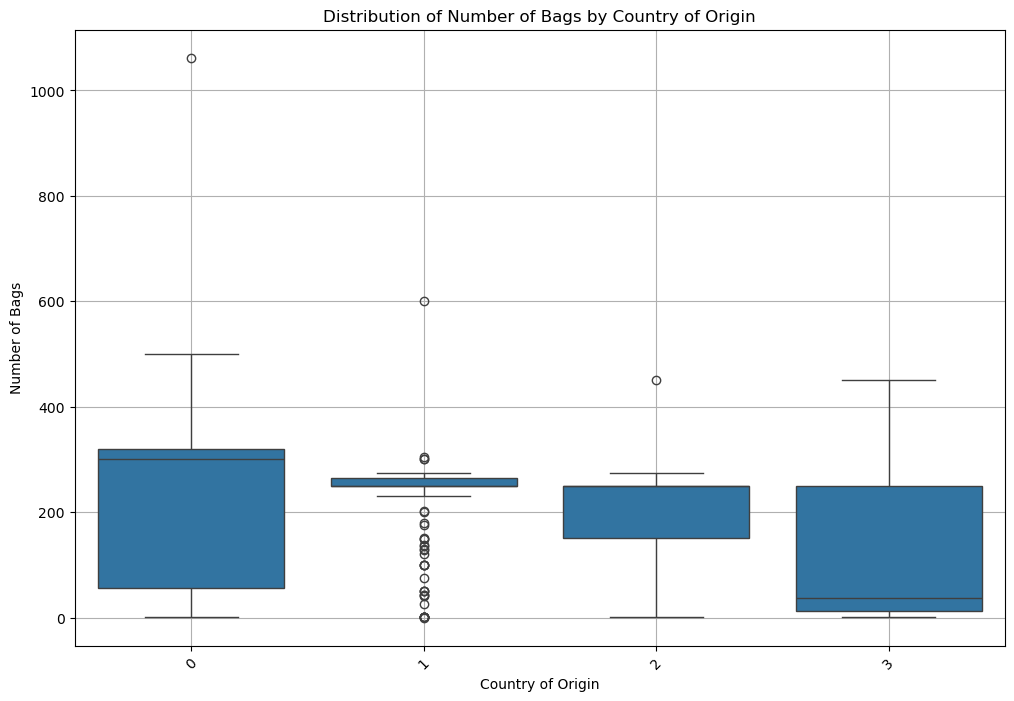

In [448]:
bags_by_origin = train[['Country.of.Origin', 'Number.of.Bags']]

# Country.of.Origin 별로 그룹화하여 각 그룹의 Number.of.Bags 분포를 확인
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country.of.Origin', y='Number.of.Bags', data=bags_by_origin)
plt.title('Distribution of Number of Bags by Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('Number of Bags')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

이상치가 있지만 만약 이상치를 제거할 경우 데이터 수가 너무 많이 줄어들기 때문에 이는 나중에 고려

## Bag.Weight

In [455]:
train['Bag.Weight'].isna().sum()

0

In [456]:
train['Bag.Weight']

0       1 kg
1      70 kg
2      69 kg
3       2 kg
4      5 lbs
       ...  
580     2 kg
581    69 kg
582     1 kg
583    70 kg
584    70 kg
Name: Bag.Weight, Length: 585, dtype: object

In [457]:
# 'Country.of.Origin' 별로 'msn'과 'psn' 카운트
kg_counts = train.groupby('Country.of.Origin')['Bag.Weight'].apply(lambda x: x.str.count('kg').sum())
lbs_counts = train.groupby('Country.of.Origin')['Bag.Weight'].apply(lambda x: x.str.count('lbs').sum())

print("각 Country.of.Origin에서 kg 카운트:")
print(kg_counts)
print("\n각 Country.of.Origin에서 lbs 카운트:")
print(lbs_counts)

각 Country.of.Origin에서 kg 카운트:
Country.of.Origin
0    106
1    133
2    147
3    183
Name: Bag.Weight, dtype: int64

각 Country.of.Origin에서 lbs 카운트:
Country.of.Origin
0    2
1    5
2    2
3    3
Name: Bag.Weight, dtype: int64


In [458]:
# Bag.Weight 열의 값에 따라 kg로 변환하는 함수 정의
def convert_to_kg(value):
    # 만약 값이 비어있으면 그대로 반환
    if pd.isna(value):
        return value
    # 만약 값에 'kg'가 포함되어 있다면 이를 삭제한 후 반환
    elif 'kg' in str(value):
        return float(value.replace('kg', '').strip())
    # 만약 값이 'lbs'로 끝나면 lbs를 kg로 변환하여 반환
    elif str(value).endswith('lbs'):
        weight_in_lbs = float(value.replace('lbs', '').strip())
        weight_in_kg = weight_in_lbs * 0.453592  # 1 lbs = 0.453592 kg
        return weight_in_kg
    # 그 외의 경우는 단위가 없는 값으로 간주하여 kg로 반환
    else:
        return float(value)

# Bag.Weight 열에 적용하여 모든 값을 kg로 변환
train['Bag.Weight'] = train['Bag.Weight'].apply(convert_to_kg)


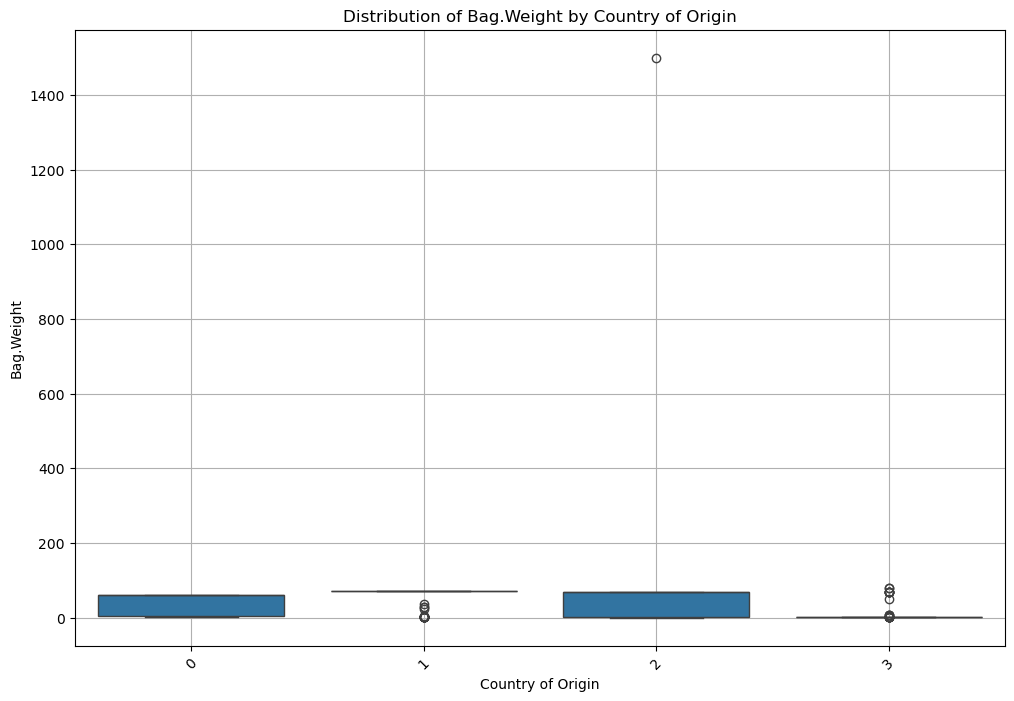

In [459]:
bags_by_origin = train[['Country.of.Origin', 'Bag.Weight']]

# Country.of.Origin 별로 그룹화하여 각 그룹의 Number.of.Bags 분포를 확인
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country.of.Origin', y='Bag.Weight', data=bags_by_origin)
plt.title('Distribution of Bag.Weight by Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('Bag.Weight')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [460]:
train['Bag.Weight']

0       1.00000
1      70.00000
2      69.00000
3       2.00000
4       2.26796
         ...   
580     2.00000
581    69.00000
582     1.00000
583    70.00000
584    70.00000
Name: Bag.Weight, Length: 585, dtype: float64

## Harvest.Year

In [461]:
train['Harvest.Year'].isna().sum()

10

In [462]:
train['Harvest.Year']

0              2012
1      Mayo a Julio
2              2017
3              2014
4              2013
           ...     
580       2015/2016
581            2017
582            2012
583           4T/10
584            2014
Name: Harvest.Year, Length: 585, dtype: object

In [371]:
import re
import numpy as np

# Harvest.Year 열의 값에서 연도를 추출하여 반환하는 함수 정의
def extract_year(value):
    # 값이 비어있으면 nan 반환
    if pd.isna(value):
        return np.nan
    # 정규식을 사용하여 모든 연도 추출
    matches = re.finditer(r'\b(19|20)(\d{2})\b', str(value))
    # 추출된 연도가 없으면 nan 반환
    if not matches:
        return np.nan
    # 모든 매치의 연도를 리스트에 추가하여 반환
    years = []
    for match in matches:
        years.append(int(match.group()))
    return years

# Harvest.Year 열에 적용하여 모든 값을 연도로 변환
train['Harvest.Year'] = train['Harvest.Year'].apply(extract_year)


In [372]:
train['Harvest.Year']

0            [2012]
1                []
2            [2017]
3            [2014]
4            [2013]
           ...     
580    [2015, 2016]
581          [2017]
582          [2012]
583              []
584          [2014]
Name: Harvest.Year, Length: 585, dtype: object

In [375]:
# 두 개 이상의 값이 있는 경우에는 두 값의 평균을 사용하는 함수 정의
def handle_multiple_years(value):
    # 만약 값이 nan이면 그대로 반환
    # 만약 값이 리스트 형태가 아니라면 그대로 반환
    if not isinstance(value, list):
        return value
    # 리스트의 길이가 1보다 작거나 같으면 그대로 반환
    if len(value) <= 1:
        return value[0] if len(value) == 1 else np.nan
    # 리스트의 길이가 2 이상이면 두 값의 평균을 계산하여 반환
    return np.mean(value)

# Harvest.Year 열에 적용하여 모든 값을 연도로 변환
train['Harvest.Year'] = train['Harvest.Year'].apply(handle_multiple_years)


In [378]:
train['Harvest.Year']

0      2012.0
1         NaN
2      2017.0
3      2014.0
4      2013.0
        ...  
580    2015.5
581    2017.0
582    2012.0
583       NaN
584    2014.0
Name: Harvest.Year, Length: 585, dtype: float64

In [379]:
train['Harvest.Year'].isna().sum()

25

In [380]:
max_harvest_year = train['Harvest.Year'].mode()[0]  # 최빈값 계산
train['Harvest.Year'].fillna(max_harvest_year, inplace=True)  # nan 값을 최빈값으로 대체


In [381]:
train['Harvest.Year'].isna().sum()

0

In [383]:
train['Harvest.Year'].value_counts()

Harvest.Year
2012.0    251
2013.0     76
2014.0     62
2016.0     51
2015.0     30
2017.0     28
2011.0     21
2015.5     17
2017.5     16
2014.5     14
2010.0      6
2013.5      5
2010.5      2
2011.5      2
2009.5      2
2016.5      2
Name: count, dtype: int64

In [391]:
# Harvest.Year 열의 값에서 연도를 추출하여 반환하는 함수 정의
def extract_year(value):
    # 값이 비어있으면 nan 반환
    if pd.isna(value):
        return np.nan
    # 정규식을 사용하여 모든 연도 추출
    matches = re.finditer(r'\b(19|20)(\d{2})\b', str(value))
    # 추출된 연도가 없으면 nan 반환
    if not matches:
        return np.nan
    # 모든 매치의 연도를 리스트에 추가하여 반환
    years = []
    for match in matches:
        years.append(int(match.group()))
    return years

# Harvest.Year 열에 적용하여 모든 값을 연도로 변환
train['Harvest.Year'] = train['Harvest.Year'].apply(extract_year)
test['Harvest.Year'] = test['Harvest.Year'].apply(extract_year)

# 두 개 이상의 값이 있는 경우에는 두 값의 평균을 사용하는 함수 정의
def handle_multiple_years(value):
    # 만약 값이 nan이면 그대로 반환
    # 만약 값이 리스트 형태가 아니라면 그대로 반환
    if not isinstance(value, list):
        return value
    # 리스트의 길이가 1보다 작거나 같으면 그대로 반환
    if len(value) <= 1:
        return value[0] if len(value) == 1 else np.nan
    # 리스트의 길이가 2 이상이면 두 값의 평균을 계산하여 반환
    return np.mean(value)

# Harvest.Year 열에 적용하여 모든 값을 연도로 변환
train['Harvest.Year'] = train['Harvest.Year'].apply(handle_multiple_years)
test['Harvest.Year'] = test['Harvest.Year'].apply(handle_multiple_years)

max_harvest_year = train['Harvest.Year'].mode()[0]  # 최빈값 계산
train['Harvest.Year'].fillna(max_harvest_year, inplace=True)  # nan 값을 최빈값으로 대체
test['Harvest.Year'].fillna(max_harvest_year, inplace=True)

In [401]:
train['Harvest.Year'] = train['Harvest.Year'] - 2009

In [397]:
test['Harvest.Year'].min()

2009.5

## Grading.Date

In [402]:
train['Grading.Date'].isna().sum()

0

In [406]:
train['Grading.Date']

0        January 13th, 2012
1           July 29th, 2011
2       September 8th, 2017
3       February 13th, 2015
4      September 12th, 2014
               ...         
580          June 5th, 2015
581          July 3rd, 2017
582         July 11th, 2012
583      February 9th, 2011
584         April 8th, 2014
Name: Grading.Date, Length: 585, dtype: object

In [407]:
# Grading.Date 열의 값을 파싱하여 년, 월, 일로 나누는 함수 정의
def parse_date(date_string):
    try:
        # 날짜 문자열을 datetime 객체로 변환
        date = pd.to_datetime(date_string)
        # 년, 월, 일 추출
        year = date.year
        month = date.month
        day = date.day
        return year, month, day
    except:
        return None, None, None

# Grading.Date 열에서 년, 월, 일 추출하여 새로운 열에 추가
train['Grading.Year'], train['Grading.Month'], train['Grading.Day'] = zip(*train['Grading.Date'].apply(parse_date))

In [ ]:
# 월과 일에 대해 sin과 cos 함수를 적용하여 전처리하는 함수 정의
def preprocess_seasonality(month, day):
    # 월과 일을 0부터 1까지의 값으로 변환
    normalized_month = (month - 1) / 12  # 1월부터 12월까지를 0부터 1까지의 값으로 변환
    normalized_day = (day - 1) / 31  # 1일부터 31일까지를 0부터 1까지의 값으로 변환

    # sin과 cos 함수를 적용하여 전처리
    month_sin = np.sin(2 * np.pi * normalized_month)
    month_cos = np.cos(2 * np.pi * normalized_month)
    day_sin = np.sin(2 * np.pi * normalized_day)
    day_cos = np.cos(2 * np.pi * normalized_day)

    return month_sin, month_cos, day_sin, day_cos

# Grading.Date 열에서 월과 일 추출하여 전처리 적용
train['Grading.Month_Sin'], train['Grading.Month_Cos'], train['Grading.Day_Sin'], train['Grading.Day_Cos'] = zip(*train.apply(lambda x: preprocess_seasonality(x['Month'], x['Day']), axis=1))

## Variety

In [6]:
train['Variety'].isna().sum()

61

In [14]:
train['Variety'].fillna('default', inplace = True)

In [18]:
train_counts = train[['Variety', 'Country.of.Origin']].value_counts().reset_index(name='count')
train_counts_sorted = train_counts.sort_values(by=['Variety'])

In [19]:
train_counts_sorted

,Variety,Country.of.Origin,count
25,Arusha,1,1
24,Arusha,0,2
29,Blue Mountain,3,1
1,Bourbon,2,102
4,Bourbon,0,35
5,Bourbon,3,26
11,Catuai,0,14
21,Catuai,3,4
15,Catuai,2,8
2,Caturra,1,93


In [418]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# train 데이터에서 Variety 열을 기반으로 라벨 인코딩 규칙을 학습하고 적용
train['Variety'] = label_encoder.fit_transform(train['Variety'])

# test 데이터에서 Variety 열을 라벨 인코딩 규칙을 적용 (train 데이터에서 학습된 규칙을 사용)
test['Variety'] = label_encoder.transform(test['Variety'])

In [419]:
train[['Variety', 'Country.of.Origin']].value_counts()

Variety  Country.of.Origin
11       3                    109
2        2                    102
4        1                     93
13       1                     35
2        0                     35
         3                     26
12       0                     24
4        2                     21
7        0                     17
13       0                     15
4        3                     15
3        0                     14
8        3                     10
7        3                     10
8        2                      8
3        2                      8
8        1                      7
13       3                      6
9        3                      5
10       2                      5
13       2                      5
3        3                      4
9        2                      2
11       1                      2
0        0                      2
         1                      1
10       3                      1
6        0                      1
5        3           

In [421]:
test['Variety'].value_counts()

Variety
4     48
2     32
11    29
13    12
12     8
3      6
7      5
8      5
9      1
10     1
Name: count, dtype: int64

## Processing.Method

In [39]:
train_counts = train[['Processing.Method', 'Country.of.Origin']].value_counts().reset_index(name='count')
train_counts_sorted = train_counts.sort_values(by=['Processing.Method'])
train_counts_sorted

,Processing.Method,Country.of.Origin,count
3,Natural / Dry,0,64
5,Natural / Dry,1,17
6,Natural / Dry,3,15
8,Natural / Dry,2,8
11,Other,2,2
9,Pulped natural / honey,0,6
4,Semi-washed / Semi-pulped,0,21
7,Semi-washed / Semi-pulped,3,12
0,Washed / Wet,3,155
1,Washed / Wet,2,134
